IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy
import os

In [2]:
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

READ AND DISPLAY FILES

In [3]:
df1=pd.read_csv(r'C:\Users\Lenovo\Desktop\loan data analysis\Book1.csv')
df2=pd.read_csv(r'C:\Users\Lenovo\Desktop\loan data analysis\PDA-Zappy-Loan-Data.csv')
# df1=pd.read_csv(r'C:\Users\Lenovo\Desktop\loan data analysis\Book1.csv')
df1

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,1.0,1.0,Y
1,1003,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,3.0,N
2,1005,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,Y
3,1006,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,Y
4,1008,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2266,1.0,1.0,2.0,1.0,0.0,3100.0,1400.0,113.0,360.0,1.0,1.0,Y
395,2272,1.0,1.0,2.0,1.0,0.0,3276.0,484.0,135.0,360.0,0.0,2.0,Y
396,2277,2.0,0.0,0.0,1.0,0.0,3180.0,0.0,71.0,360.0,0.0,1.0,N
397,2281,1.0,1.0,0.0,1.0,0.0,3033.0,1459.0,95.0,360.0,1.0,1.0,Y


In [4]:
df2

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
243,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
244,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
245,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y


COMBINE TWO DATAFRAMES

In [5]:
df1.columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status']

In [6]:
df2.columns=['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status']

In [7]:

frames=[df1,df2]
loan_data=pd.concat(frames,axis=0)
# df1.append(df2)
loan_data
# loan_data=loan_data.reset_index(drop=True)

# pd.merge(df1, df2, on='Loan_ID', how='outer')

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1002,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,1.0,1.0,Y
1,1003,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,3.0,N
2,1005,1.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,Y
3,1006,1.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,Y
4,1008,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,2.0,0.0,0.0,1.0,0.0,2900.0,0.0,71.0,333.0,1.0,3.0,Y
243,2979,1.0,1.0,3.0,1.0,0.0,4106.0,0.0,40.0,180.0,1.0,3.0,Y
244,2983,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,333.0,1.0,1.0,Y
245,2984,1.0,1.0,2.0,1.0,0.0,7583.0,0.0,187.0,333.0,1.0,1.0,Y


================================================================================================================

BASIC EXPLORATION OF DATA

========================================================================================================================

CHECKING SHAPE OF DATASET

In [8]:
loan_data.shape

(646, 13)

DISPLAY COLUMN NAMES

In [9]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

CHECKING DATATYPES IN DATASET

In [10]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 646 entries, 0 to 246
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            646 non-null    object 
 1   Gender             645 non-null    float64
 2   Married            645 non-null    float64
 3   Dependents         645 non-null    float64
 4   Graduate           645 non-null    float64
 5   Self_Employed      645 non-null    float64
 6   ApplicantIncome    645 non-null    float64
 7   CoapplicantIncome  645 non-null    float64
 8   LoanAmount         645 non-null    float64
 9   Loan_Amount_Term   645 non-null    float64
 10  Credit_History     645 non-null    float64
 11  Property_Area      645 non-null    float64
 12  Loan_Status        645 non-null    object 
dtypes: float64(11), object(2)
memory usage: 70.7+ KB


CALCULATE DESCRIPTIVE STATISTICS

In [11]:
loan_data.describe()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1.186047,0.648062,0.731783,0.784496,0.130233,5365.589147,1608.560806,148.150388,334.837209,0.776744,1.959690
std,0.389446,0.477945,1.002015,0.411491,0.336820,6021.940563,2867.004510,86.122299,63.206969,0.416752,0.789048
min,1.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2875.000000,0.000000,101.000000,333.000000,1.000000,1.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3813.000000,1229.000000,128.000000,360.000000,1.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5726.000000,2306.000000,168.000000,360.000000,1.000000,3.000000
max,2.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000


CHECK NULL VALUES

In [12]:
loan_data.isna().sum()

Loan_ID              0
Gender               1
Married              1
Dependents           1
Graduate             1
Self_Employed        1
ApplicantIncome      1
CoapplicantIncome    1
LoanAmount           1
Loan_Amount_Term     1
Credit_History       1
Property_Area        1
Loan_Status          1
dtype: int64

REMOVE NULL VALUES

In [13]:
loan_data=loan_data.dropna()
loan_data.shape

(645, 13)

GENEERATE HEATMAP TO FIND CORRALATION BTW VARIABLES

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10652\4272302542.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loan_data.corr(), annot=True, cmap='inferno')


<AxesSubplot:>

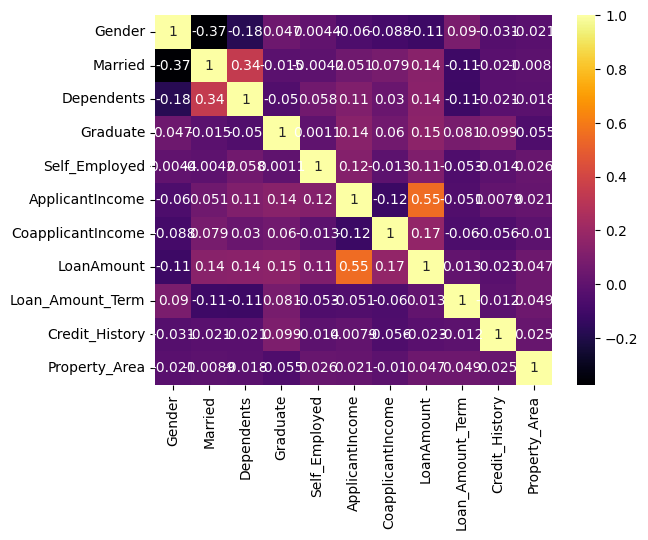

In [14]:
sns.heatmap(loan_data.corr(), annot=True, cmap='inferno')

EXPLORE ALL THE VARIABLES INDIVIDUALLY

In [15]:
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Graduate',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

EXPLORING GENDER

Percentage of Male applicant: 81.4%
Percentage of Female applicant: 18.6%


Text(0.5, 1.0, 'Distribution of male and female applicants')

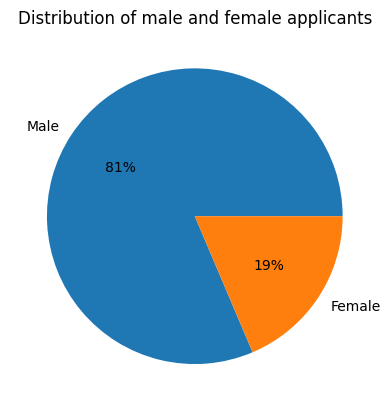

In [16]:
countMale = len(loan_data[loan_data['Gender'] == 1])
countFemale = len(loan_data[loan_data['Gender'] == 2])

print("Percentage of Male applicant: {:.1f}%".format((countMale / (len(loan_data['Gender']))*100)))
print("Percentage of Female applicant: {:.1f}%".format((countFemale / (len(loan_data['Gender']))*100)))

lables=['Male','Female']
data=[countMale,countFemale]
plt.pie(data, labels = lables,autopct='%.0f%%')
plt.title('Distribution of male and female applicants')

Percentage of Married applicant: 64.8%
Percentage of UnMarried applicant: 35.2%


Text(0.5, 1.0, 'Distribution of married and non_married applicants')

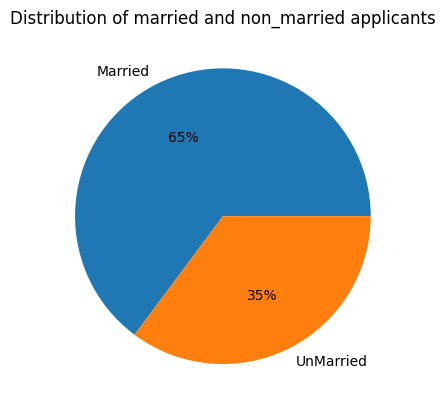

In [17]:
Married = len(loan_data[loan_data['Married'] == 1])
NotMarried = len(loan_data[loan_data['Married'] == 0])

print("Percentage of Married applicant: {:.1f}%".format((Married / (len(loan_data['Married']))*100)))
print("Percentage of UnMarried applicant: {:.1f}%".format((NotMarried / (len(loan_data['Married']))*100)))

lables=['Married','UnMarried']
data=[Married,NotMarried]
plt.pie(data, labels = lables,autopct='%.0f%%')
plt.title('Distribution of married and non_married applicants')

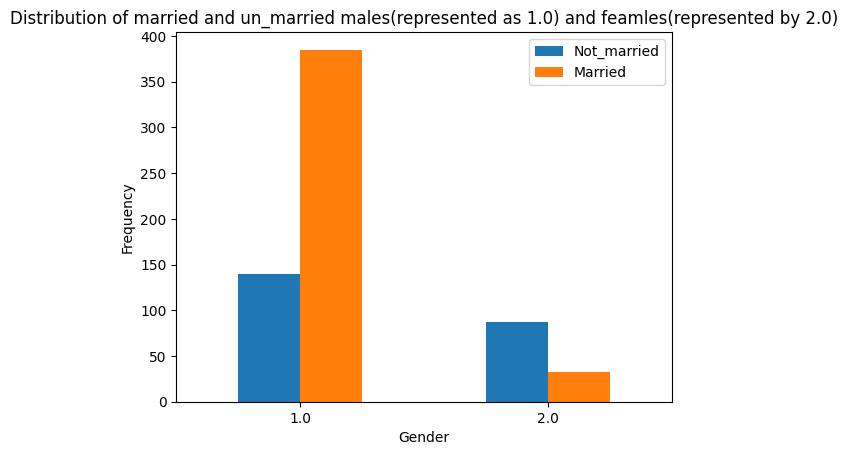

In [18]:
pd.crosstab(loan_data.Gender,loan_data.Married).plot(kind="bar")
plt.title('Distribution of married and un_married males(represented as 1.0) and feamles(represented by 2.0)')
plt.xlabel('Gender')
plt.legend(['Not_married','Married'])
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

Percentage of graduate applicant: 78.4%
Percentage of Not graduate applicant: 21.6%


Text(0.5, 1.0, 'Distribution of graduated and non_graduated applicants')

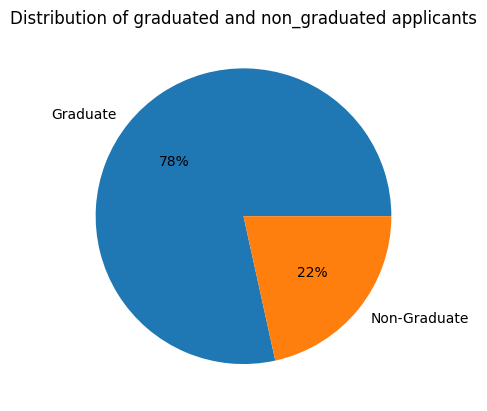

In [19]:
countGraduate = len(loan_data[loan_data['Graduate'] == 1])
countNotGraduate = len(loan_data[loan_data['Graduate'] == 0])

print("Percentage of graduate applicant: {:.1f}%".format((countGraduate / (len(loan_data['Graduate']))*100)))
print("Percentage of Not graduate applicant: {:.1f}%".format((countNotGraduate / (len(loan_data['Graduate']))*100)))

lables=['Graduate','Non-Graduate']
data=[countGraduate,countNotGraduate]
plt.pie(data, labels = lables,autopct='%.0f%%')
plt.title('Distribution of graduated and non_graduated applicants')

Percentage of Not self employed: 87.0%
Percentage of self employed: 13.0%


Text(0.5, 1.0, 'Distribution of employed and non_unemployed applicants')

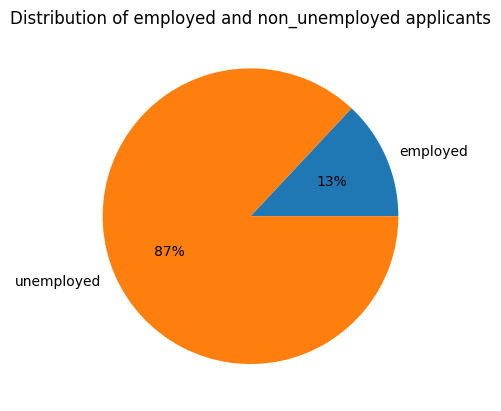

In [20]:
countNo = len(loan_data[loan_data.Self_Employed == 0])
countYes = len(loan_data[loan_data.Self_Employed == 1])

print("Percentage of Not self employed: {:.1f}%".format((countNo / (len(loan_data.Self_Employed))*100)))
print("Percentage of self employed: {:.1f}%".format((countYes / (len(loan_data.Self_Employed))*100)))

lables=['employed','unemployed']
data=[countYes,countNo ]
plt.pie(data, labels = lables,autopct='%.0f%%')
plt.title('Distribution of employed and non_unemployed applicants')

Percentage of Good credit history: 77.7%
Percentage of Bad credit history: 22.3%


Text(0.5, 1.0, 'Distribution of Good credit_card history and bad credit_card history applicants')

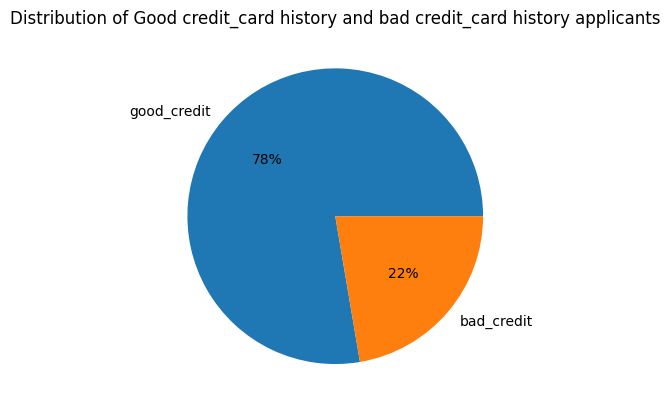

In [21]:
count1 = len(loan_data[loan_data.Credit_History == 1])
count0 = len(loan_data[loan_data.Credit_History == 0])
# countNull = len(df[df.Credit_History.isnull()])

print("Percentage of Good credit history: {:.1f}%".format((count1 / (len(loan_data.Credit_History))*100)))
print("Percentage of Bad credit history: {:.1f}%".format((count0 / (len(loan_data.Credit_History))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Credit_History))*100)))

lables=['good_credit','bad_credit']
data=[count1,count0 ]
plt.pie(data, labels = lables,autopct='%.0f%%')
plt.title('Distribution of Good credit_card history and bad credit_card history applicants')

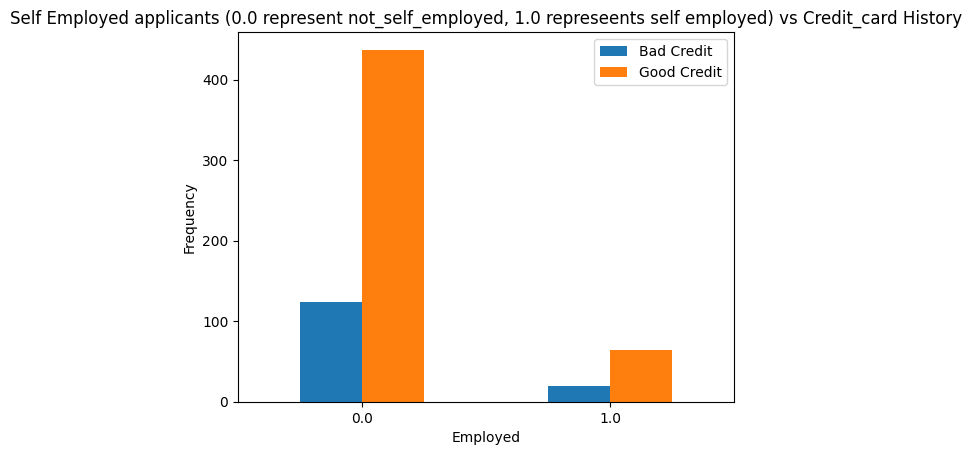

In [22]:
pd.crosstab(loan_data.Self_Employed,loan_data.Credit_History).plot(kind="bar")
plt.title('Self Employed applicants (0.0 represent not_self_employed, 1.0 represeents self employed) vs Credit_card History')
plt.xlabel('Employed')
plt.ylabel('Frequency')
plt.legend(["Bad Credit", "Good Credit"])
plt.xticks(rotation=0)
plt.show()

Percentage of Urban: 33.2%
Percentage of Rural: 29.1%
Percentage of Semiurban: 37.7%


Text(0.5, 1.0, 'Distribution of Urban,Rural and Semi_urban applicants')

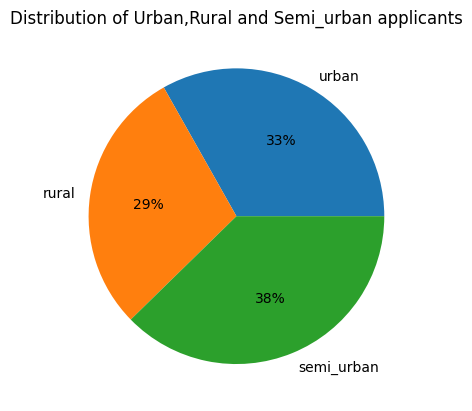

In [23]:
countUrban = len(loan_data[loan_data.Property_Area == 1])
countRural = len(loan_data[loan_data.Property_Area == 3])
countSemiurban = len(loan_data[loan_data.Property_Area == 2])


print("Percentage of Urban: {:.1f}%".format((countUrban / (len(loan_data.Property_Area))*100)))
print("Percentage of Rural: {:.1f}%".format((countRural / (len(loan_data.Property_Area))*100)))
print("Percentage of Semiurban: {:.1f}%".format((countSemiurban / (len(loan_data.Property_Area))*100)))


lables=['urban','rural','semi_urban']
data=[countUrban,countRural,countSemiurban ]
plt.pie(data, labels = lables,autopct='%.0f%%')
plt.title('Distribution of Urban,Rural and Semi_urban applicants')

In [24]:
loan_data['Loan_Status'] = loan_data['Loan_Status'].str.replace(" ", "")
loan_data['Loan_Status'].unique()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10652\1514084668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['Loan_Status'] = loan_data['Loan_Status'].str.replace(" ", "")


array(['Y', 'N'], dtype=object)

Percentage of Approved: 68.8%
Percentage of Rejected: 31.2%


Text(0.5, 1.0, 'Distribution of Approved and Rejected applicants')

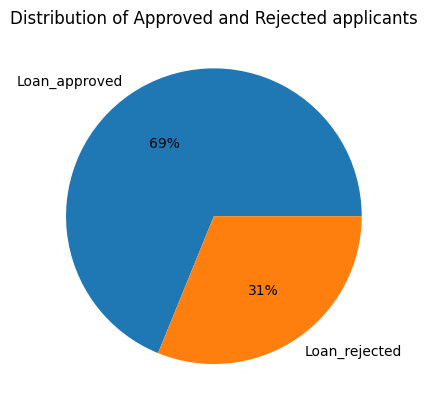

In [25]:
countY = len(loan_data[loan_data.Loan_Status == 'Y'])
countN = len(loan_data[loan_data.Loan_Status == 'N'])
# countNull = len(df[df.Loan_Status.isnull()])

print("Percentage of Approved: {:.1f}%".format((countY / (len(loan_data.Loan_Status))*100)))
print("Percentage of Rejected: {:.1f}%".format((countN / (len(loan_data.Loan_Status))*100)))
# print("Missing values percentage: {:.2f}%".format((countNull / (len(df.Loan_Status))*100)))

lables=['Loan_approved','Loan_rejected']
data=[countY,countN]
plt.pie(data, labels = lables,autopct='%.0f%%')
plt.title('Distribution of Approved and Rejected applicants')

Percentage of 12: 0.16%
Percentage of 36: 0.31%
Percentage of 60: 0.31%
Percentage of 84: 0.62%
Percentage of 120: 0.47%
Percentage of 180: 6.98%
Percentage of 240: 0.62%
Percentage of 300: 2.17%
Percentage of 360: 52.87%
Percentage of 480: 2.95%


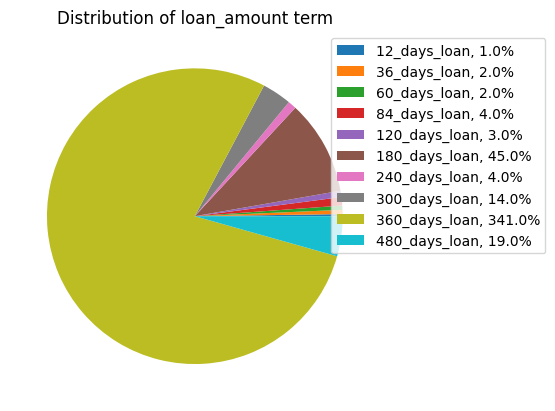

In [26]:
count12 = len(loan_data[loan_data['Loan_Amount_Term'] == 12.0])
count36 = len(loan_data[loan_data['Loan_Amount_Term'] == 36.0])
count60 = len(loan_data[loan_data['Loan_Amount_Term'] == 60.0])
count84 = len(loan_data[loan_data['Loan_Amount_Term'] == 84.0])
count120 = len(loan_data[loan_data['Loan_Amount_Term'] == 120.0])
count180 = len(loan_data[loan_data['Loan_Amount_Term']== 180.0])
count240 = len(loan_data[loan_data['Loan_Amount_Term'] == 240.0])
count300 = len(loan_data[loan_data['Loan_Amount_Term'] == 300.0])
count360 = len(loan_data[loan_data['Loan_Amount_Term'] == 360.0])
count480 = len(loan_data[loan_data['Loan_Amount_Term']== 480.0])

print("Percentage of 12: {:.2f}%".format((count12 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 36: {:.2f}%".format((count36 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 60: {:.2f}%".format((count60 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 84: {:.2f}%".format((count84 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 120: {:.2f}%".format((count120 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 180: {:.2f}%".format((count180 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 240: {:.2f}%".format((count240 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 300: {:.2f}%".format((count300 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 360: {:.2f}%".format((count360 / (len(loan_data.Loan_Amount_Term))*100)))
print("Percentage of 480: {:.2f}%".format((count480 / (len(loan_data.Loan_Amount_Term))*100)))

lables=['12_days_loan','36_days_loan','60_days_loan','84_days_loan','120_days_loan','180_days_loan','240_days_loan','300_days_loan','360_days_loan','480_days_loan']
data=[count12,count36,count60,count84,count120,count180,count240,count300,count360,count480]
plt.pie(data)
plt.title('Distribution of loan_amount term')
# plt.legend(lables)
labels = [f'{l}, {s:0.1f}%' for l, s in zip(lables, data)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

==========================================================================================================

DATA PRE-PROCESSING

==========================================================================================================

DROP UNNECESSARY COLUMNS

In [27]:
loan_data = loan_data.drop(['Loan_ID'], axis = 1)

In [28]:
# as the data is already encoded, so data encoding process is not needed

CHECKING OUTLIERS

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Dependents'),
  Text(3, 0, 'Graduate'),
  Text(4, 0, 'Self_Employed'),
  Text(5, 0, 'ApplicantIncome'),
  Text(6, 0, 'CoapplicantIncome'),
  Text(7, 0, 'LoanAmount'),
  Text(8, 0, 'Loan_Amount_Term'),
  Text(9, 0, 'Credit_History'),
  Text(10, 0, 'Property_Area')])

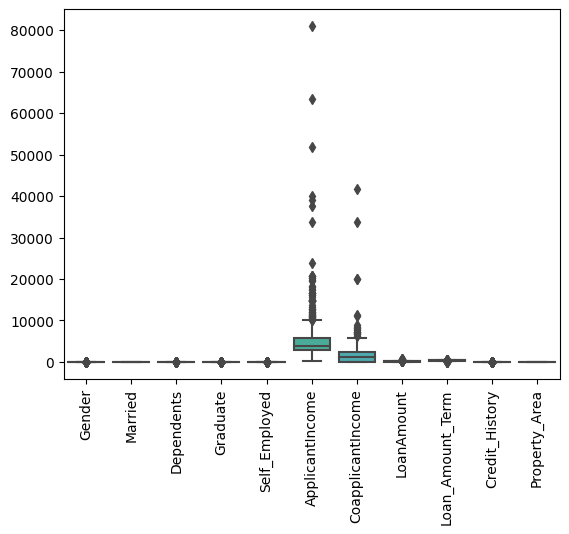

In [29]:
sns.boxplot(loan_data)
plt.xticks(rotation = 90)

REMOVING OUTLIERS

In [30]:
Q1 = loan_data.quantile(0.25)
Q3 = loan_data.quantile(0.75)
IQR = Q3 - Q1

loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10652\3515061523.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = loan_data.quantile(0.25)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10652\3515061523.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = loan_data.quantile(0.75)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10652\3515061523.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Married'),
  Text(2, 0, 'Dependents'),
  Text(3, 0, 'Graduate'),
  Text(4, 0, 'Self_Employed'),
  Text(5, 0, 'ApplicantIncome'),
  Text(6, 0, 'CoapplicantIncome'),
  Text(7, 0, 'LoanAmount'),
  Text(8, 0, 'Loan_Amount_Term'),
  Text(9, 0, 'Credit_History'),
  Text(10, 0, 'Property_Area')])

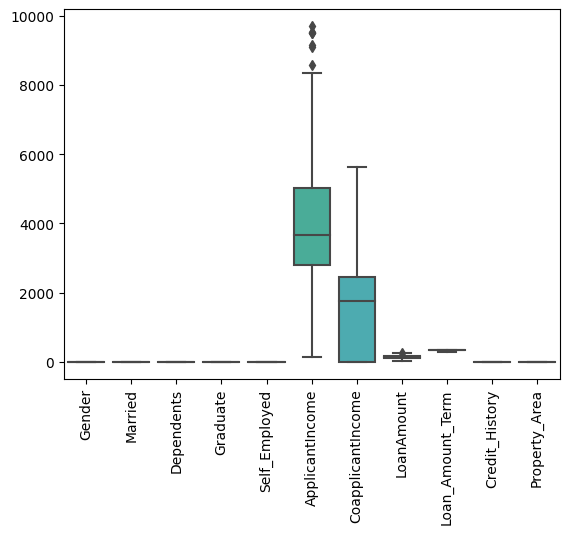

In [31]:
sns.boxplot(loan_data)
plt.xticks(rotation = 90)

ONE HOT ENCODIGN THE TARGET VARIABLE

In [32]:
loan_data = pd.get_dummies(loan_data)
loan_data

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_N,Loan_Status_Y
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,1.0,1.0,0,1
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,3.0,1,0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,0,1
8,1.0,1.0,2.0,1.0,0.0,4006.0,1526.0,168.0,360.0,1.0,1.0,0,1
10,1.0,1.0,2.0,1.0,0.0,3200.0,700.0,70.0,360.0,1.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1.0,0.0,0.0,1.0,0.0,3676.0,4301.0,172.0,333.0,1.0,3.0,0,1
239,1.0,1.0,1.0,1.0,0.0,3400.0,2500.0,173.0,333.0,1.0,2.0,0,1
241,1.0,1.0,0.0,1.0,0.0,3232.0,1950.0,108.0,333.0,1.0,3.0,0,1
244,1.0,1.0,1.0,1.0,0.0,8072.0,240.0,253.0,333.0,1.0,1.0,0,1


In [33]:
loan_data=loan_data.drop(['Loan_Status_N'],axis=1)
loan_data.rename(columns = {'Loan_Status_Y':'Loan_Status'}, inplace = True)


In [34]:
loan_data.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1.0,0.0,5849.0,0.0,128.0,360.0,1.0,1.0,1
1,1.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,3.0,0
4,1.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,1
8,1.0,1.0,2.0,1.0,0.0,4006.0,1526.0,168.0,360.0,1.0,1.0,1
10,1.0,1.0,2.0,1.0,0.0,3200.0,700.0,70.0,360.0,1.0,1.0,1


MAKING INPUT AND OUTPUT FEATURES

In [35]:
loan_data.shape

(202, 12)

In [36]:
x = loan_data.drop(["Loan_Status"], axis=1)
y = loan_data["Loan_Status"]

APPLY NORMALIZATION

In [37]:
x = MinMaxScaler().fit_transform(x)

SPLITTING DATA TO TEST AND TRAIN

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0,shuffle=False)

DECISION TREE CLASSIFIER

In [47]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
dtAcc2 = accuracy_score(y_pred,y_test)
print('dECISION TREE accuracy: {:.2f}%'.format(dtAcc2*100))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.88      0.83      0.85        35

    accuracy                           0.76        41
   macro avg       0.56      0.58      0.57        41
weighted avg       0.79      0.76      0.77        41

[[ 2  4]
 [ 6 29]]
dECISION TREE accuracy: 75.61%


RANDOM FOREST CLASSIFIER

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
rfAcc2 = accuracy_score(y_pred,y_test)
print('Random forest accuracy: {:.2f}%'.format(rfAcc2*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.85      1.00      0.92        35

    accuracy                           0.85        41
   macro avg       0.43      0.50      0.46        41
weighted avg       0.73      0.85      0.79        41

[[ 0  6]
 [ 0 35]]
Random forest accuracy: 85.37%


C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1